# Практическая работа №3: Исследование задач о раскрасках

Выполнил студент гр. 1304 Заика Тимофей. Вариант №35.

## Цель работы

Формирование представления о задачах о раскарсках, выработать умение использование леммы Бёрнсайда для решения задачи о раскрасках, привить навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи.

## Основные теоретические положения

### Действие группы на множество
Пусть $G$ - группа с нейтральным элементом $e$, a $X$ - множество. Будем говорить, что $G$ действует на $X$, если задана операция $G \times X \rightarrow X$.   
$\forall$ $x \in X$ и $g, h \in G$, при том:
<ul>
<li>$ex = x$</li>  
<li>$g(h(x)) = gh(x)$</li>
</ul>

### Определение орбиты
Орбитой элемента $x \in X$ под действием $G$ называется множество  
$Gx = \{gx : g \in G\}$
Длина орбиты - количество элементов в ней, обозначается $\#G$

### Неподвижные точки
Неподвижными точками элемента $g \in G$ называются $x \in X : gx = x$<br>
Множество неподвижных точек элемента $g$ обозначается $X^g$

### Лемма Бернсайда
Количество орбит действия группы $G$ на множестве $X$ равно  
$\frac{1}{\#G}\sum_{g \in G} \#X^{g}$

### Определение раскраски
Пусть $I$ - произвольное множество, а $C$ - множество цветов. Раскраской множества $I$ называется функция из $I$ в $C$. Множество всех раскрасок обозначается через $C^I$, количество раскрасок равно $\#C^{\#I}$ 

### Количество раскрасок
Количество раскрасок из $C^I$, которые сохраняют данный элемент $g \in G$ равно $\#C^{c(\varphi(g)))}$  
$с(\varphi(g))$ - количество независимых циклов перестановки $\varphi(g)$

## Постановка задачи

Аналитически решить задачу о раскрасках; графически отобразить решения задачи с использованием системы компьютерной алгебры <i>SageMath</i>. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Условие задачи

Сколькими способами можно составить бусы из 46 бусинок 6 различных цветов (с точностью до поворотов и осевых симметрий)?

### 1. Лемма Бёрнсайда

Пусть $X$ - множество всех раскрасок, которые записываются в виде $\{ x_1, x_2, x_3, ..., x_{46} \}$, где $x_k = \{ a, b, c, d, e, f \}$ - один из 6-ти цветов.<br>
Тогда всего с учетом поворотов и осевых симметрий в множестве $X$ - $ 6^{46} $ элементов.

Пусть G - группа поворотов и осевых симметрий множества X, она изоморфна подгруппе $ G^* \in S_{46} $,  $ G^{*} = \{ 1, 2, 3, 4, ..., 46 \} $

Рассмотрим элементарные преобразования положений бусин:<br>
Пусть $ \tau $ - поворот на 1 бусину по часовой стрелке, а $ \sigma $ - осевая симметрия относительно оси, отделяющей $ \{ 1, 2, 3, ..., 22 \} $ от $ \{ 23, 24, 25, ..., 46 \} $.

Опишем всес возможные повороты и осевые симметрии для бус.<br>
Поворотот на 1 бусину по часовой:
$$ \tau = (1, 2, 3, 4, ... 45, 46) $$
Всего возможно 45 поворотов, на 46 поворот бусы встанут в изначальное положение.

Представим функцию <i>rotate_counter</i>, считающую всевозможные повороты бусин по часовой стрелке:

In [2]:
def rotate_counter():
    G = SymmetricGroup(46)
    beads_numbers = G(tuple(srange(1, 47)))
    for i in range(1, 46):
        print(f"\u03C4^{i} =", beads_numbers**i)
        
rotate_counter()

τ^1 = (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46)
τ^2 = (1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45)(2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46)
τ^3 = (1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,2,5,8,11,14,17,20,23,26,29,32,35,38,41,44)
τ^4 = (1,5,9,13,17,21,25,29,33,37,41,45,3,7,11,15,19,23,27,31,35,39,43)(2,6,10,14,18,22,26,30,34,38,42,46,4,8,12,16,20,24,28,32,36,40,44)
τ^5 = (1,6,11,16,21,26,31,36,41,46,5,10,15,20,25,30,35,40,45,4,9,14,19,24,29,34,39,44,3,8,13,18,23,28,33,38,43,2,7,12,17,22,27,32,37,42)
τ^6 = (1,7,13,19,25,31,37,43,3,9,15,21,27,33,39,45,5,11,17,23,29,35,41)(2,8,14,20,26,32,38,44,4,10,16,22,28,34,40,46,6,12,18,24,30,36,42)
τ^7 = (1,8,15,22,29,36,43,4,11,18,25,32,39,46,7,14,21,28,35,42,3,10,17,24,31,38,45,6,13,20,27,34,41,2,9,16,23,30,37,44,5,12,19,26,33,40)
τ^8 = (1,9,17,25,33,41,3,11,19,27,35,4

Отражение бус по оси симметрии:$$\sigma = (1, 46)(2, 45)(3, 44)\dots(20, 25)(21, 24)(22, 23)$$

Представим функцию <i>symmetric_rotate_combination_counter()</i>, которая считает всевозможные комбинации осевой симметрии и поворотов:

In [3]:
def symmetric_rotate_combination_counter():
    G = SymmetricGroup(46)
    beads_numbers = G(tuple(srange(1, 47)))
    symmetric_beads_numbers = G(srange(46, 0, -1))
    for i in range(1, 46):
        print(f"\u03C3 * \u03C4^{i} =", (beads_numbers ** i) * symmetric_beads_numbers)
        
symmetric_rotate_combination_counter()

σ * τ^1 = (1,45)(2,44)(3,43)(4,42)(5,41)(6,40)(7,39)(8,38)(9,37)(10,36)(11,35)(12,34)(13,33)(14,32)(15,31)(16,30)(17,29)(18,28)(19,27)(20,26)(21,25)(22,24)
σ * τ^2 = (1,44)(2,43)(3,42)(4,41)(5,40)(6,39)(7,38)(8,37)(9,36)(10,35)(11,34)(12,33)(13,32)(14,31)(15,30)(16,29)(17,28)(18,27)(19,26)(20,25)(21,24)(22,23)(45,46)
σ * τ^3 = (1,43)(2,42)(3,41)(4,40)(5,39)(6,38)(7,37)(8,36)(9,35)(10,34)(11,33)(12,32)(13,31)(14,30)(15,29)(16,28)(17,27)(18,26)(19,25)(20,24)(21,23)(44,46)
σ * τ^4 = (1,42)(2,41)(3,40)(4,39)(5,38)(6,37)(7,36)(8,35)(9,34)(10,33)(11,32)(12,31)(13,30)(14,29)(15,28)(16,27)(17,26)(18,25)(19,24)(20,23)(21,22)(43,46)(44,45)
σ * τ^5 = (1,41)(2,40)(3,39)(4,38)(5,37)(6,36)(7,35)(8,34)(9,33)(10,32)(11,31)(12,30)(13,29)(14,28)(15,27)(16,26)(17,25)(18,24)(19,23)(20,22)(42,46)(43,45)
σ * τ^6 = (1,40)(2,39)(3,38)(4,37)(5,36)(6,35)(7,34)(8,33)(9,32)(10,31)(11,30)(12,29)(13,28)(14,27)(15,26)(16,25)(17,24)(18,23)(19,22)(20,21)(41,46)(42,45)(43,44)
σ * τ^7 = (1,39)(2,38)(3,37)(4,36)(5,35)(6,

Зададим формулой действие элементов группы G на множестве X с помощью $ G^{*} $:
$$ g(\{x_1, x_2, x_3, x_4, ..., x_{46}\}) = \{x_{(g^{*})^{−1}(1)}, x_{(g^{*})^{−1}(2)}, x_{(g^{*})^{−1}(3)}, \dots, x_{(g^{*})^{−1}(46)}\}, \text{ где } g^{*} \in G^{*}, g \in G $$
Цвет первой бусины $ x_1 $ после поворота по часовой на одну бусину ($ \tau $) стал $ x_{46} $, что соответствует $ \tau^{-1}(1) = \tau(45) = 46 $.

В соответствии с леммой Бернсайда, количество орбит действия группы $ G $ на множестве $ X $ равно:
$$N = \frac{1}{\#G}\sum_{g \in G}{\#X^g}$$
Орбиты действия - это разбиение множества X на классы эквивалентности относительно действий G и это же искомое число способов составить бусы с точностью до поворотов и осевых симметрий.

Найдем $ \#X^g $ (количество раскрасок, которые остаются на месте под действием преобразования g) для каждого $ g \in G $:
$ \tau, \tau^2, ..., \sigma \times \tau^{45} $ (они состоят из произведений независимых циклов). Получается, что если все бусины в одном цикле одинакого цвета, тогда под действием преобразования расцветка бус не изментся, изменятся только позиции, чем и являтеся $ X^g $. 

Тогда $ \#X^g = 6^{с(g)} $, где $ с(g) $ - количество независимых циклов в перестановке $ g $, а 6 - количество цветов.<br>
Посчитаем $\#X^g $ для всех $ g \in G$.

Для этого представим функцию burnside_lemma(), которая также считает $\sum_{g \in G}{\#X^g}$ и $N$ и выводит результаты на экран.

In [9]:
def burnside_lemma():
    G = SymmetricGroup(46)
    elementary_beads = G([(i) for i in range(1, 47, 1)])
    beads_numbers = G(tuple(srange(1, 47, 1)))
    symmetric_beads_numbers = G(srange(46, 0, -1))
    result = 0
    
    X_g = len(elementary_beads.cycle_tuples(singletons=True))
    result += 6 ** X_g
    print(f"#X^e = 6^{X_g} =", 6 ** X_g)

    X_g = len(beads_numbers.cycle_tuples(singletons=True))
    result += 6 ** X_g
    print(f"#X^\u03C4 = 6^{X_g} =", 6 ** X_g)
    for i in range(2, 46):
        X_g = len((beads_numbers ** i).cycle_tuples(singletons=True))
        result += 6 ** X_g
        print(f"#X^(\u03C4^{i}) = 6^{X_g} =", 6 ** X_g)

    X_g = len(symmetric_beads_numbers.cycle_tuples(singletons=True))
    result += 6 ** X_g
    print(f"#X^(\u03C3) = 6^{X_g} =", 6 ** X_g)
    for i in range(1, 46):
        X_g = len(((beads_numbers ** i) * symmetric_beads_numbers).cycle_tuples(singletons=True))
        result += 6 ** X_g
        print(f"#X^(\u03C3 * \u03C4^{i}) = 6^{X_g} =", 6 ** X_g)

    print(f"#X^g sum =", result)
    print(f"N =", result/92)
    
    
burnside_lemma()

#X^e = 6^46 = 623673825204293256669089197883129856
#X^τ = 6^1 = 6
#X^(τ^2) = 6^2 = 36
#X^(τ^3) = 6^1 = 6
#X^(τ^4) = 6^2 = 36
#X^(τ^5) = 6^1 = 6
#X^(τ^6) = 6^2 = 36
#X^(τ^7) = 6^1 = 6
#X^(τ^8) = 6^2 = 36
#X^(τ^9) = 6^1 = 6
#X^(τ^10) = 6^2 = 36
#X^(τ^11) = 6^1 = 6
#X^(τ^12) = 6^2 = 36
#X^(τ^13) = 6^1 = 6
#X^(τ^14) = 6^2 = 36
#X^(τ^15) = 6^1 = 6
#X^(τ^16) = 6^2 = 36
#X^(τ^17) = 6^1 = 6
#X^(τ^18) = 6^2 = 36
#X^(τ^19) = 6^1 = 6
#X^(τ^20) = 6^2 = 36
#X^(τ^21) = 6^1 = 6
#X^(τ^22) = 6^2 = 36
#X^(τ^23) = 6^23 = 789730223053602816
#X^(τ^24) = 6^2 = 36
#X^(τ^25) = 6^1 = 6
#X^(τ^26) = 6^2 = 36
#X^(τ^27) = 6^1 = 6
#X^(τ^28) = 6^2 = 36
#X^(τ^29) = 6^1 = 6
#X^(τ^30) = 6^2 = 36
#X^(τ^31) = 6^1 = 6
#X^(τ^32) = 6^2 = 36
#X^(τ^33) = 6^1 = 6
#X^(τ^34) = 6^2 = 36
#X^(τ^35) = 6^1 = 6
#X^(τ^36) = 6^2 = 36
#X^(τ^37) = 6^1 = 6
#X^(τ^38) = 6^2 = 36
#X^(τ^39) = 6^1 = 6
#X^(τ^40) = 6^2 = 36
#X^(τ^41) = 6^1 = 6
#X^(τ^42) = 6^2 = 36
#X^(τ^43) = 6^1 = 6
#X^(τ^44) = 6^2 = 36
#X^(τ^45) = 6^1 = 6
#X^(σ) = 6^23 = 789730

Таким образом, искомое число возможных раскрасок бус из 46 бусинок 6 цветов (с точностью до поворотов и осевой симметрии):

$$ N = 6779063317437971571797666658334641 $$

### 2. Графическое представление раскраски

Представим функции <i>rotate_beads</i>, которая будет вращать бусы по часовой стрелке, а также <i>draw_colored_beads</i>, которая как раз будет представлять раскраску графически:

In [31]:
def rotate_beads(x_y, angle):
    angle = angle * pi() / 180
    
    return (matrix([[cos(angle), -sin(angle)], [sin(angle), cos(angle)]]) * x_y.transpose()).transpose()


def draw_colored_beads(coloring_number, distance_between_beads = 100, bead_size = 50, beads = 46):
    num = 6
    colors = ["red", "green", "blue", "brown", "violet", "orange"]
    beads_color = []
    
    for _ in range(46):
        beads_color.append(colors[coloring_number % num])
        coloring_number //= num
        
    x_y = matrix([distance_between_beads, 0])
    start_angle = 360 / beads
    bead = point(x_y.list(), color = beads_color[0], size = bead_size)
    
    for i in range(1, beads):
        current_center_x_y = (rotate_beads(x_y, start_angle * i)).list()
        bead += point(current_center_x_y, color = beads_color[i], size = bead_size)
        
    show(bead, axes=False)

Представим примеры некоторых раскрасок:

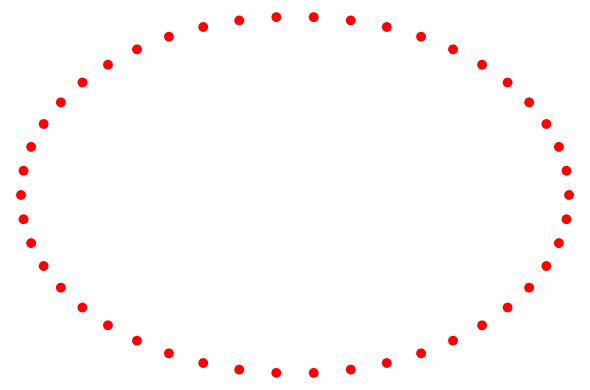

In [32]:
draw_colored_beads(0)

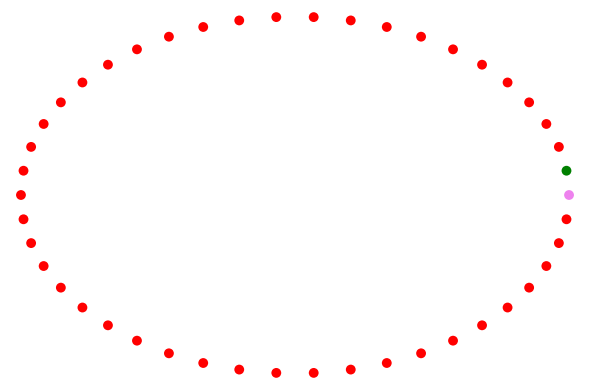

In [33]:
draw_colored_beads(10)

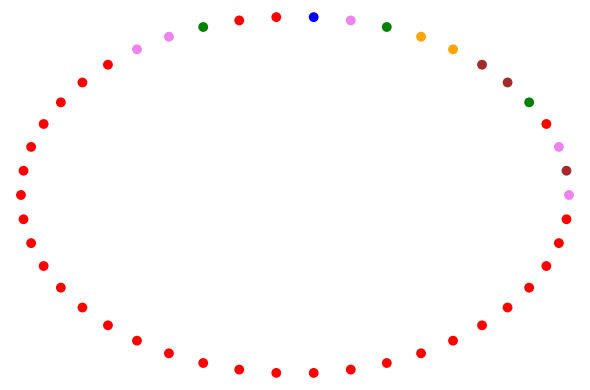

In [34]:
draw_colored_beads(13244531231254)

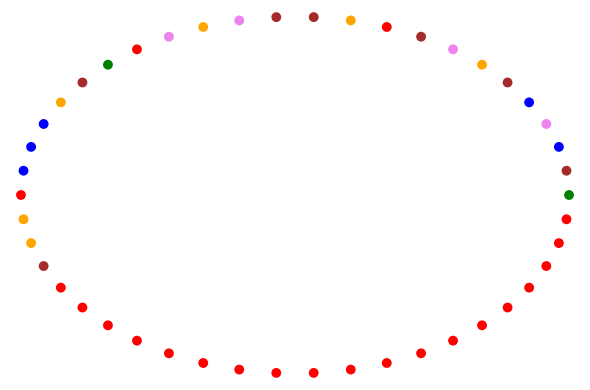

In [39]:
draw_colored_beads(677906331743797157179)

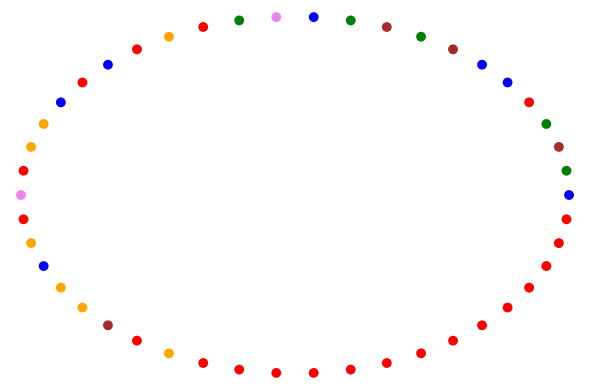

In [40]:
draw_colored_beads(6779063317437971571794444)

### Вывод

Средствами системы компьютерной алгебры <i>SageMath</i> удалось графически представить раскраску, основанную на использовании леммы Бернсайда.

## Выводы

Сформированы представления о задачах о раскарсках, выработано умение использование леммы Бёрнсайда для решения задачи о раскрасках, привит навык использования систем компьютерной алгебры для реализации алгоритмов решения задачи. Аналитически решена задача о раскрасках и полученные результаты содержательно проинтерпретированны; графически отображено решение задачи о раскраске 46 бусин в 6 цветов с точностью до поворотов и осевых симметрий с использованием системы компьютерной алгебры <i>SageMath</i>.